In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import random
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
!unzip '/content/drive/MyDrive/IR/IR Project/depression_dataset.zip' -d '/content/drive/MyDrive/IR/IR Project/Depression_dataset'

In [ ]:
!unzip '/content/drive/MyDrive/depression_set (1).zip' -d '/content/drive/MyDrive/IR/IR Project/Depression_dataset'

Archive:  /content/drive/MyDrive/depression_set (1).zip
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/captions.txt  
   creating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/1.png  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/10.jpg  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/11.jpeg  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/12.jpg  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/13.jpg  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/14.png  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img/15.jpeg  
  inflating: /content/drive/MyDrive/IR/IR Project/Depression_dataset/depress

In [ ]:
import json

In [ ]:
# Load the training set
train_file = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/train.jsonl'

In [ ]:
valid_file = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/val.jsonl'

In [ ]:
test_file = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/test.jsonl'

In [ ]:
sample_file = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/test_set.jsonl'

In [ ]:
sample_image_id= {}
#image_label = []
with open(sample_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        sample_image_id[data['image']] = data['label']

In [ ]:
print(sample_image_id)

{'img/1.png': 1, 'img/10.jpg': 1, 'img/11.jpeg': 1, 'img/12.jpg': 1, 'img/13.jpg': 0, 'img/14.png': 1, 'img/15.jpeg': 1, 'img/16.jpg': 0, 'img/17.png': 0, 'img/18.jpg': 1, 'img/19.jpg': 1, 'img/2.png': 1, 'img/20.jpg': 1, 'img/3.png': 0, 'img/4.png': 0, 'img/5.png': 0, 'img/6.png': 0, 'img/7.png': 0, 'img/8.png': 0, 'img/9.png': 0}


In [ ]:
import os
import shutil

# Example input dictionary with labels for each image
labels=sample_image_id

# Directory containing images
image_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img'
src_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img_inference/'


if not os.path.exists(src_dir):
    os.makedirs(src_dir)
    print(f"Directory '{src_dir}' created successfully!")
else:
    print(f"Directory '{src_dir}' already exists.")


# Create subdirectories for each label
for label in set(labels.values()):
    subdir = os.path.join(src_dir, str(label))
    os.makedirs(subdir, exist_ok=True)

# Move images to corresponding subdirectories
for filename in os.listdir(image_dir):
    if ('img/'+str(filename)) in labels:
        label = labels['img/'+ str(filename)]
        src = os.path.join(image_dir, filename)
        
        dst = os.path.join(src_dir, str(label), filename)
        
        shutil.copy(src, dst)


Directory '/content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img_inference/' created successfully!


In [ ]:
image_id= {}
#image_label = []
with open(train_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        image_id[data['image']] = data['label']
        #image_label.append(data['label'])

In [ ]:
print(len(image_id))

4380


In [ ]:
image_id_valid= {}
#image_label = []
with open(valid_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        image_id_valid[data['image']] = data['label']

In [ ]:
image_id_test= {}
#image_label = []
with open(test_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        image_id_test[data['image']] = data['label']

In [ ]:
print(len(image_id_valid))
print(len(image_id_test))

547
548


In [ ]:
import os
import shutil

# Example input dictionary with labels for each image
labels=image_id

# Directory containing images
image_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/img'
src_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/train'


if not os.path.exists(src_dir):
    os.makedirs(src_dir)
    print(f"Directory '{src_dir}' created successfully!")
else:
    print(f"Directory '{src_dir}' already exists.")


# Create subdirectories for each label
for label in set(labels.values()):
    subdir = os.path.join(src_dir, str(label))
    os.makedirs(subdir, exist_ok=True)

# Move images to corresponding subdirectories
for filename in os.listdir(image_dir):
    if ('img/'+str(filename)) in labels:
        label = labels['img/'+ str(filename)]
        src = os.path.join(image_dir, filename)
        
        dst = os.path.join(src_dir, str(label), filename)
        
        shutil.copy(src, dst)


Directory '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/train' created successfully!


In [ ]:
# import os

# image_extensions = [".jpg", ".jpeg", ".png", ".gif"] # Add more extensions if needed
# directory_path = "/content/drive/MyDrive/DL  Assignments /hateful_memes/train2/0" # Replace with the path to your directory

# image_count = 0
# for filename in os.listdir(directory_path):
#     # print(filename)
#     if os.path.splitext(filename)[1].lower() in image_extensions:
#         image_count += 1

# print(f"There are {image_count} image files in {directory_path}.")

There are 5481 image files in /content/drive/MyDrive/DL  Assignments /hateful_memes/train2/0.


In [ ]:
# import os

# image_extensions = [".jpg", ".jpeg", ".png", ".gif"] # Add more extensions if needed
# directory_path = "/content/drive/MyDrive/DL  Assignments /hateful_memes/train2/1" # Replace with the path to your directory

# # image_count = 0
# for filename in os.listdir(directory_path):
#     # print(filename)
#     if os.path.splitext(filename)[1].lower() in image_extensions:
#         image_count += 1

# print(f"There are {image_count} image files in {directory_path}.")

There are 8500 image files in /content/drive/MyDrive/DL  Assignments /hateful_memes/train2/1.


In [ ]:
import os
import shutil

# Example input dictionary with labels for each image
labels=image_id_valid

# Directory containing images
image_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/img'
src_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/valid'


if not os.path.exists(src_dir):
    os.makedirs(src_dir)
    print(f"Directory '{src_dir}' created successfully!")
else:
    print(f"Directory '{src_dir}' already exists.")


# Create subdirectories for each label
for label in set(labels.values()):
    subdir = os.path.join(src_dir, str(label))
    os.makedirs(subdir, exist_ok=True)

# Move images to corresponding subdirectories
i = 0
for filename in os.listdir(image_dir):
    # print('img/'+str(filename))
    if ('img/'+str(filename)) in labels:
        print(i)
        label = labels['img/'+ str(filename)]
        src = os.path.join(image_dir, filename)
        # print(src)
        dst = os.path.join(src_dir, str(label), filename)
        # print(dst)
        shutil.copy(src, dst)
        i = i + 1


In [ ]:
import os
import shutil

# Example input dictionary with labels for each image
labels=image_id_test

# Directory containing images
image_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/img'
src_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/test'


if not os.path.exists(src_dir):
    os.makedirs(src_dir)
    print(f"Directory '{src_dir}' created successfully!")
else:
    print(f"Directory '{src_dir}' already exists.")


# Create subdirectories for each label
for label in set(labels.values()):
    subdir = os.path.join(src_dir, str(label))
    os.makedirs(subdir, exist_ok=True)

# Move images to corresponding subdirectories
for filename in os.listdir(image_dir):
    # print('img/'+str(filename))
    if ('img/'+str(filename)) in labels:
        label = labels['img/'+ str(filename)]
        src = os.path.join(image_dir, filename)
        # print(src)
        dst = os.path.join(src_dir, str(label), filename)
        # print(dst)
        shutil.copy(src, dst)


Directory '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/test' created successfully!


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
import tensorflow as tf

In [ ]:
from keras import backend as K

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dropout,Activation
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Train_Datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# Valid_Datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     )
Test_Datagen  = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
Sample_Datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
Train_Data_Itr = Train_Datagen.flow_from_directory(directory = r'/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/train',
                                                   target_size = (128,128),
                                                   class_mode = 'binary',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 4370 images belonging to 2 classes.


In [ ]:
sample_Data_Itr = Sample_Datagen.flow_from_directory(directory = r'/content/drive/MyDrive/IR/IR Project/Depression_dataset/depression_set/img_inference',
                                                   target_size = (128,128),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 20 images belonging to 2 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create an ImageDataGenerator object with the desired augmentation parameters
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# specify the directory where the validation images are located
validation_dir = '/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/valid'

# create a generator for the validation images
Valid_Data_Itr = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),  # resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary')  # specify the classification task (binary for binary classification)

# use the generator to create a set of validation images
# validation_images, validation_labels = Valid_Data_Itr.next()


Found 544 images belonging to 2 classes.


In [ ]:
 Test_Data_Itr = Test_Datagen.flow_from_directory(directory = r'/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/test',
                                                  target_size = (128,128),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 547 images belonging to 2 classes.


In [ ]:
# Define the Datasets, corresponding to the given iterators used to fit the model with the given models and validate the result.
train_Dataset = Train_Data_Itr
valid_Dataset = Valid_Data_Itr
test_Dataset = Test_Data_Itr 

In [ ]:
# Define the F-1 Score as Evaluation Metric
# Reference - 
def get_f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        get_f1_score
]

In [ ]:
# Reduce learning rate when a metric has stopped improving.
# Often waits for patience no. of Epochs before reducing the Learning Rate.
# Recue the Learning Rate by 'factor'/.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=10)

In [ ]:
# Use ResNet
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freezing Layers
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
# List of History
hist_list = []

In [ ]:
# modelRes=Sequential()
# modelRes.add(base_model)
# modelRes.add(Dropout(0.5))
# modelRes.add(Flatten())
# #modelRes.add(BatchNormalization())
# modelRes.add(Dense(32,kernel_initializer='he_uniform'))
# #modelRes.add(BatchNormalization())
# modelRes.add(Activation('relu'))
# # modelRes.add(Dropout(0.5))
# # modelRes.add(Dense(1024, activation='relu'))
# # modelRes.add(Dense(256, activation='relu'))
# modelRes.add(Dense(1,activation='sigmoid'))

In [ ]:
from keras import regularizers

In [ ]:
modelRes=Sequential()
modelRes.add(base_model)
modelRes.add(Dropout(0.5))
modelRes.add(Flatten())
modelRes.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))  # add a dense layer with 128 units
modelRes.add(BatchNormalization())
modelRes.add(Dense(32,kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.01)))
modelRes.add(BatchNormalization())
modelRes.add(Activation('relu'))
modelRes.add(Dense(1,activation='sigmoid'))

# Model-3 VGG19



In [ ]:
vgg19 = tf.keras.applications.VGG19(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [ ]:
modelVGG=Sequential()
modelVGG.add(vgg19)
modelVGG.add(Dropout(0.5))
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization())
modelVGG.add(Dense(32,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dense(1,activation='sigmoid'))

# Model - 4 ( InceptionV3, Pre-Trained on 'ImageNet' )

In [ ]:
InceptionV3 = tf.keras.applications.InceptionV3(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [ ]:
modelInceptionV3=Sequential()
modelInceptionV3.add(InceptionV3)
modelInceptionV3.add(Dropout(0.5))
modelInceptionV3.add(Flatten())
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Dense(32,kernel_initializer='he_uniform'))
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Activation('relu'))
modelInceptionV3.add(Dense(1,activation='sigmoid'))

# Model-5 ( Xception,Pre-Trained on 'ImageNet')

In [ ]:
Xception = tf.keras.applications.Xception(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
modelXception=Sequential()
modelXception.add(Xception)
modelXception.add(Dropout(0.5))
modelXception.add(Flatten())
modelXception.add(BatchNormalization())
modelXception.add(Dense(32,kernel_initializer='he_uniform'))
modelXception.add(BatchNormalization())
modelXception.add(Activation('relu'))
modelXception.add(Dense(1,activation='sigmoid'))

In [ ]:
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
modelRes.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                      

In [ ]:
modelRes.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [ ]:
modelVGG.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [ ]:
modelInceptionV3.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [ ]:
modelXception.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [ ]:
tf.config.run_functions_eagerly(False)

In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


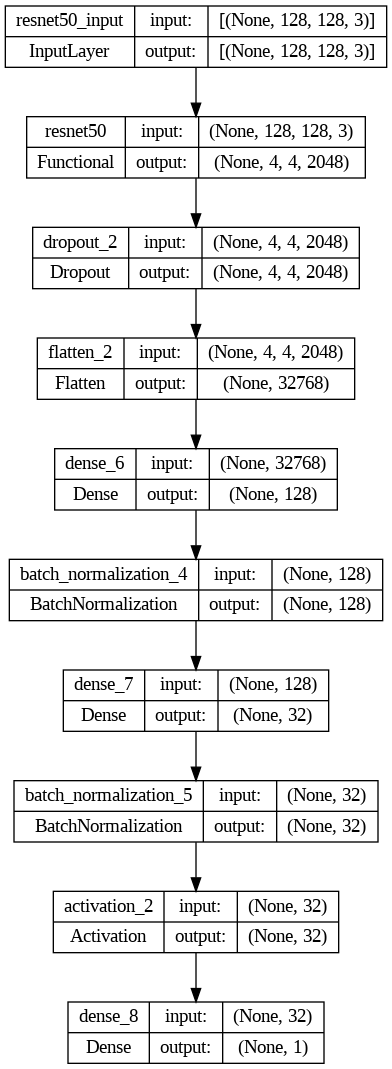

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelRes, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

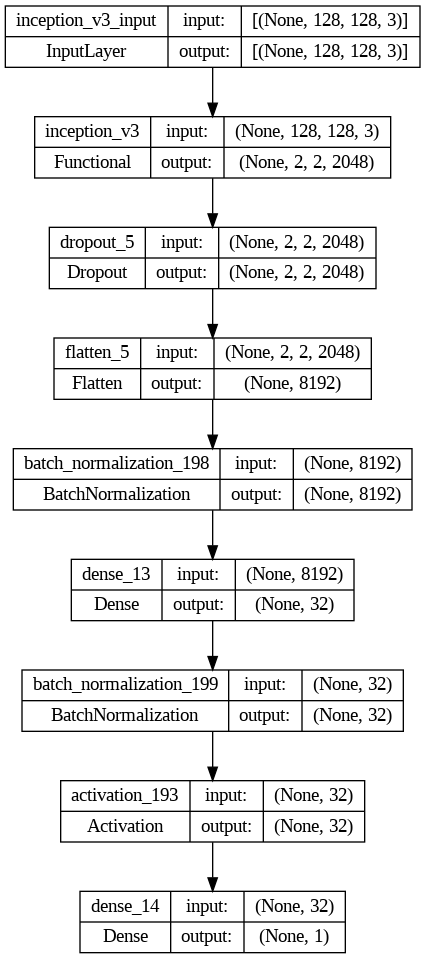

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelInceptionV3, to_file='model_plot_Inception.png', show_shapes=True, show_layer_names=True)

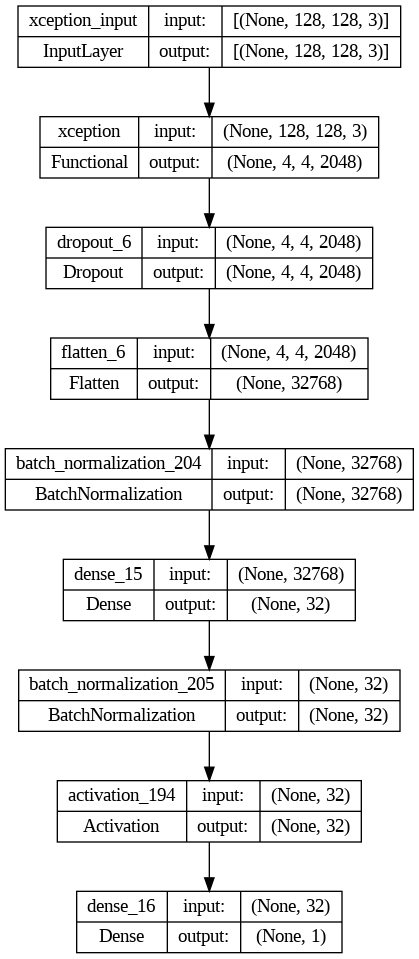

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelXception, to_file='model_plot_Xception.png', show_shapes=True, show_layer_names=True)

In [ ]:
historyResNet=modelRes.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
137/137 [==============================] - 31s 226ms/step - loss: 2.9689 - accuracy: 0.6796 - precision: 0.7048 - recall: 0.7535 - auc: 0.7414 - get_f1_score: 0.7264 - val_loss: 2.8838 - val_accuracy: 0.7096 - val_precision: 0.7923 - val_recall: 0.6645 - val_auc: 0.7790 - val_get_f1_score: 0.7176 - lr: 0.0100
Epoch 2/50
137/137 [==============================] - 31s 225ms/step - loss: 2.8358 - accuracy: 0.6911 - precision: 0.7155 - recall: 0.7603 - auc: 0.7500 - get_f1_score: 0.7350 - val_loss: 2.7815 - val_accuracy: 0.6857 - val_precision: 0.8035 - val_recall: 0.5935 - val_auc: 0.7768 - val_get_f1_score: 0.6763 - lr: 0.0100
Epoch 3/50
137/137 [==============================] - 32s 231ms/step - loss: 2.7156 - accuracy: 0.6943 - precision: 0.7124 - recall: 0.7776 - auc: 0.7529 - get_f1_score: 0.7414 - val_loss: 2.6417 - val_accuracy: 0.6930 - val_precision: 0.7003 - val_recall: 0.8065 - val_auc: 0.7701 - val_get_f1_score: 0.7412 - lr: 0.0100
Epoch 4/50
137/137 [==============

In [ ]:
modelRes.save('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelRes.h5')
hist_list.append(historyResNet)

In [ ]:
historyVGG = modelVGG.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,callbacks=[lrd,mcp,es])

Epoch 1/50
137/137 [==============================] - 74s 407ms/step - loss: 0.6639 - accuracy: 0.6455 - precision: 0.6539 - recall: 0.8033 - auc: 0.6819 - get_f1_score: 0.7111 - val_loss: 1.0517 - val_accuracy: 0.4320 - val_precision: 1.0000 - val_recall: 0.0032 - val_auc: 0.7992 - val_get_f1_score: 0.0065 - lr: 0.0100
Epoch 2/50
137/137 [==============================] - 40s 293ms/step - loss: 0.5566 - accuracy: 0.7300 - precision: 0.7644 - recall: 0.7607 - auc: 0.7891 - get_f1_score: 0.7603 - val_loss: 1.2456 - val_accuracy: 0.4393 - val_precision: 1.0000 - val_recall: 0.0161 - val_auc: 0.8057 - val_get_f1_score: 0.0294 - lr: 0.0100
Epoch 3/50
137/137 [==============================] - 42s 303ms/step - loss: 0.5204 - accuracy: 0.7485 - precision: 0.7888 - recall: 0.7631 - auc: 0.8188 - get_f1_score: 0.7719 - val_loss: 1.4131 - val_accuracy: 0.4301 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8230 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 4/50
137/137 [==

In [ ]:
modelVGG.save('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelVGG.h5')
hist_list.append(historyVGG)

In [ ]:
historyInception=modelInceptionV3.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
137/137 [==============================] - 60s 271ms/step - loss: 0.6316 - accuracy: 0.6526 - precision: 0.7242 - recall: 0.6308 - auc: 0.7193 - get_f1_score: 0.6589 - val_loss: 0.6134 - val_accuracy: 0.7188 - val_precision: 0.7211 - val_recall: 0.8258 - val_auc: 0.7948 - val_get_f1_score: 0.7624 - lr: 0.0100
Epoch 2/50
137/137 [==============================] - 35s 251ms/step - loss: 0.4982 - accuracy: 0.7506 - precision: 0.7865 - recall: 0.7720 - auc: 0.8333 - get_f1_score: 0.7767 - val_loss: 0.5058 - val_accuracy: 0.7390 - val_precision: 0.7308 - val_recall: 0.8581 - val_auc: 0.8348 - val_get_f1_score: 0.7855 - lr: 0.0100
Epoch 3/50
137/137 [==============================] - 35s 253ms/step - loss: 0.4344 - accuracy: 0.7906 - precision: 0.8219 - recall: 0.8077 - auc: 0.8774 - get_f1_score: 0.8138 - val_loss: 0.4329 - val_accuracy: 0.8015 - val_precision: 0.8389 - val_recall: 0.8065 - val_auc: 0.8791 - val_get_f1_score: 0.8219 - lr: 0.0100
Epoch 4/50
137/137 [==============

In [ ]:
modelInceptionV3.save('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelInceptionV3.h5')
hist_list.append(historyInception)

In [ ]:
historyXception=modelXception.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
137/137 [==============================] - 55s 284ms/step - loss: 0.5711 - accuracy: 0.7149 - precision: 0.7399 - recall: 0.7708 - auc: 0.7836 - get_f1_score: 0.7411 - val_loss: 0.5490 - val_accuracy: 0.7188 - val_precision: 0.7643 - val_recall: 0.7323 - val_auc: 0.7928 - val_get_f1_score: 0.7460 - lr: 0.0100
Epoch 2/50
137/137 [==============================] - 37s 273ms/step - loss: 0.4782 - accuracy: 0.7691 - precision: 0.8039 - recall: 0.7868 - auc: 0.8481 - get_f1_score: 0.7925 - val_loss: 0.5123 - val_accuracy: 0.7426 - val_precision: 0.7374 - val_recall: 0.8516 - val_auc: 0.8356 - val_get_f1_score: 0.7832 - lr: 0.0100
Epoch 3/50
137/137 [==============================] - 36s 265ms/step - loss: 0.4117 - accuracy: 0.8085 - precision: 0.8345 - recall: 0.8282 - auc: 0.8902 - get_f1_score: 0.8296 - val_loss: 0.4571 - val_accuracy: 0.7776 - val_precision: 0.8078 - val_recall: 0.8000 - val_auc: 0.8648 - val_get_f1_score: 0.8005 - lr: 0.0100
Epoch 4/50
137/137 [==============

In [ ]:
modelXception.save('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelXception.h5')
hist_list.append(historyXception)

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1,model_name):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Training', 'Validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['Training', 'Validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['Training', 'Validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['Training', 'Validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['Training', 'Validation'])
    plt.show()
    plt.savefig('/content/drive/MyDrive/IR/IR Project/Results/{}.png'.format(model_name), bbox_inches='tight')

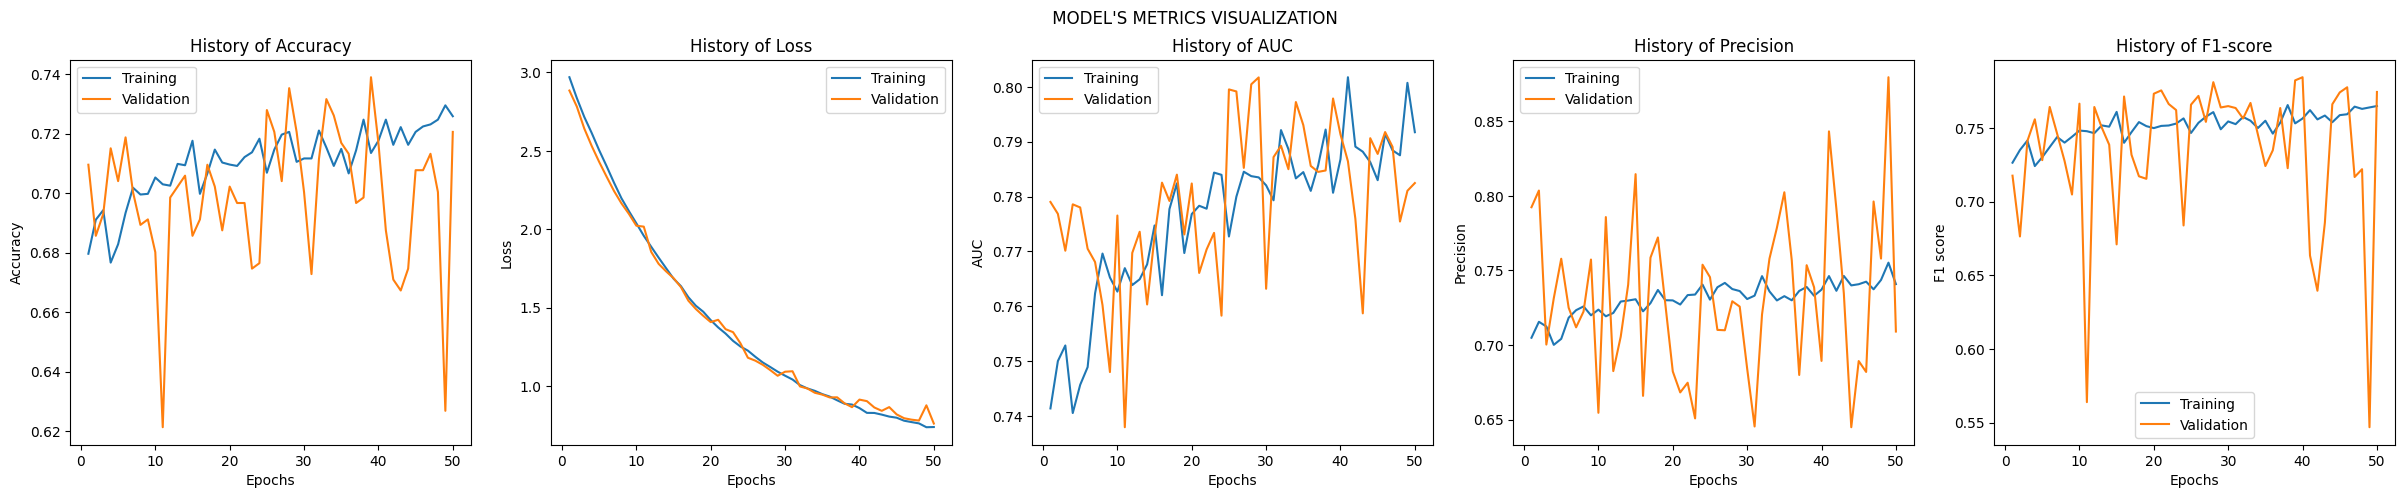

<Figure size 640x480 with 0 Axes>

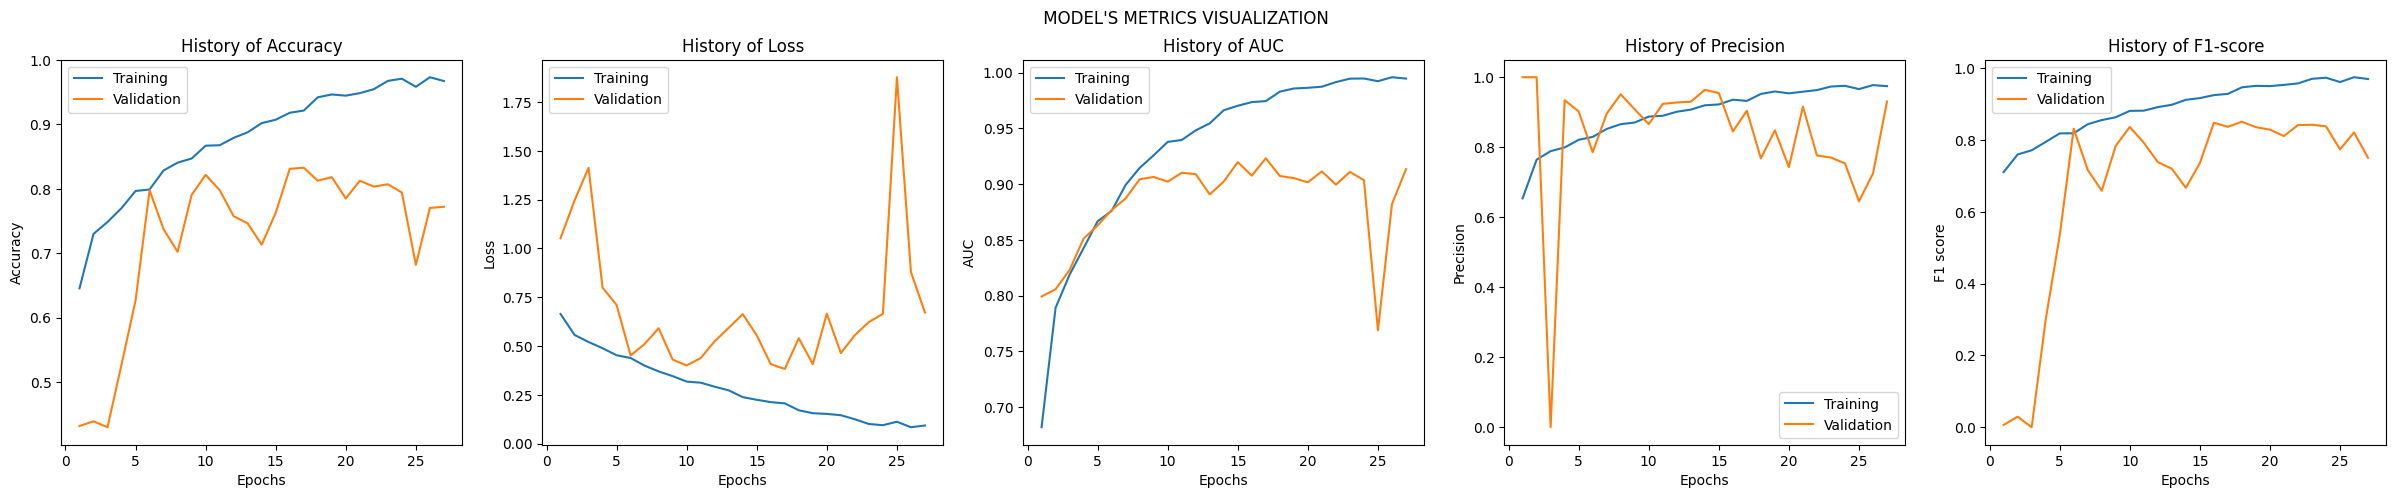

<Figure size 640x480 with 0 Axes>

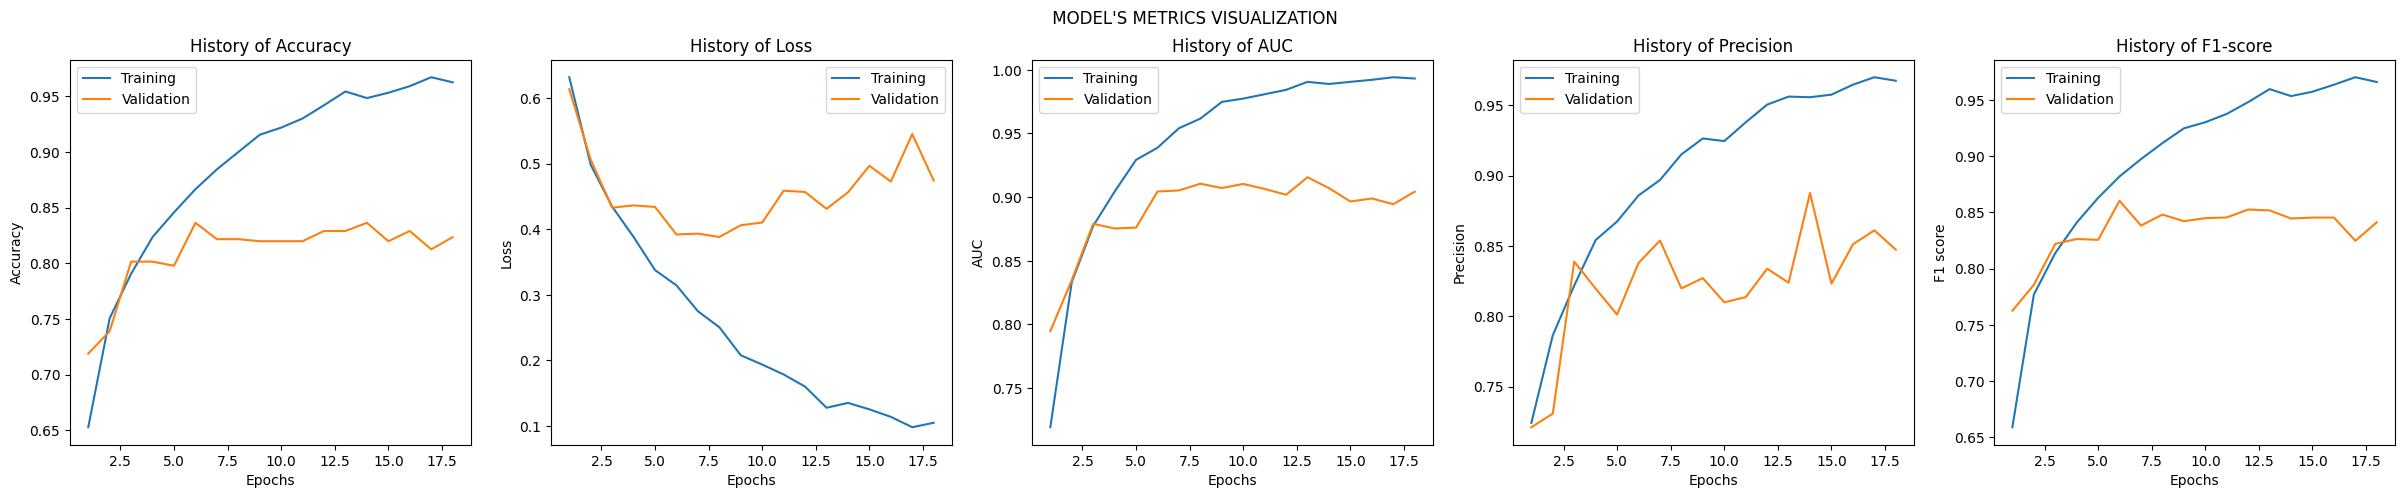

<Figure size 640x480 with 0 Axes>

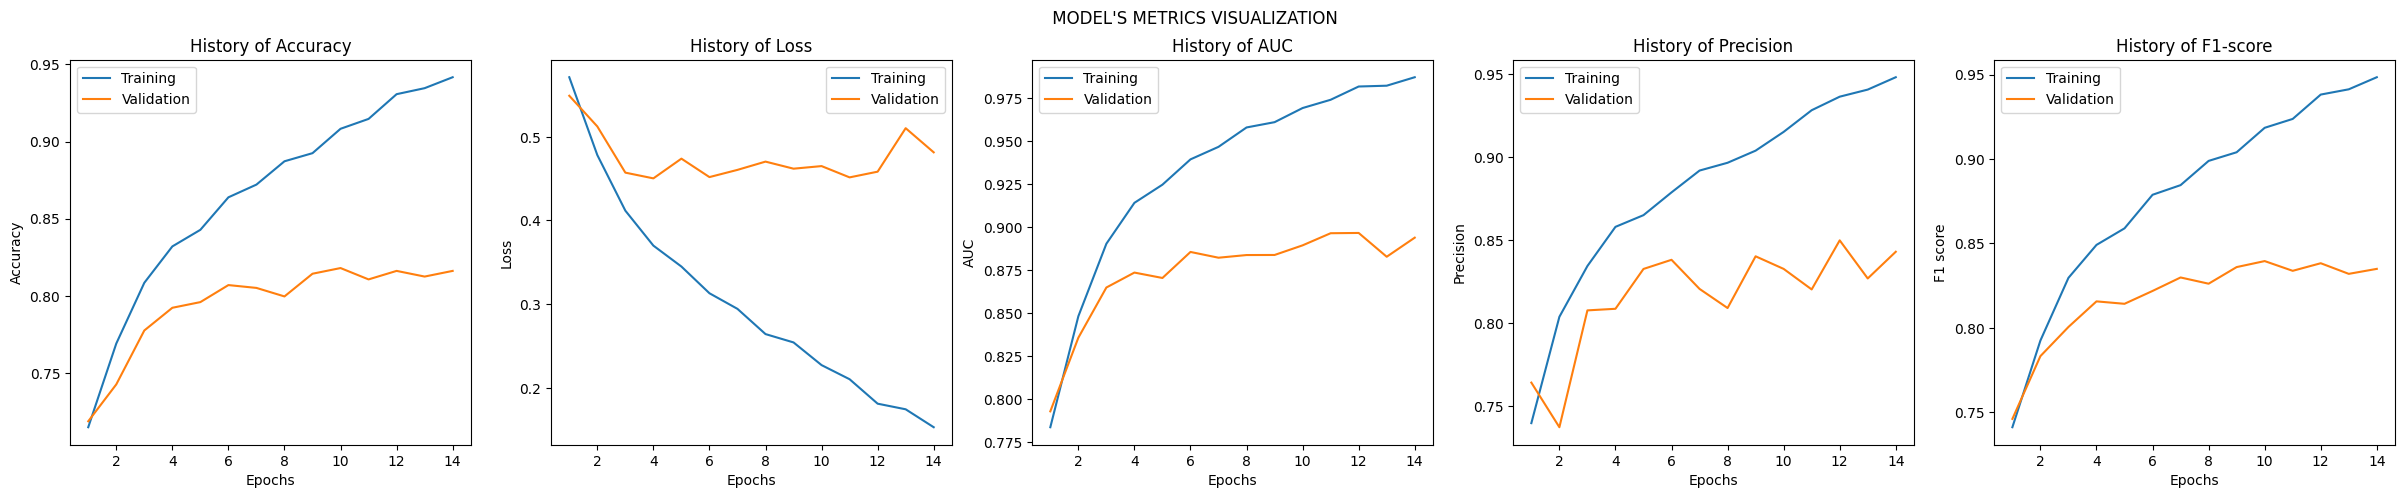

<Figure size 640x480 with 0 Axes>

In [ ]:
lst = ['ResNet','VGG','Inception','Xception']
for i in range(len(lst)):
  history = hist_list[i]
  Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
              history.history['precision'],history.history['val_precision'],
               history.history['get_f1_score'],history.history['val_get_f1_score'],lst[i]
              )

In [ ]:
Xception_load = tf.keras.models.load_model('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelXception.h5', custom_objects={"get_f1_score": get_f1_score })

In [ ]:
Inception_load = tf.keras.models.load_model('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelInceptionV3.h5', custom_objects={"get_f1_score": get_f1_score })

In [ ]:
VGG_load = tf.keras.models.load_model('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelVGG.h5', custom_objects={"get_f1_score": get_f1_score })

In [ ]:
ResNet_load = tf.keras.models.load_model('/content/drive/MyDrive/IR/IR Project/Depression_dataset/content/main_data/modelRes.h5', custom_objects={"get_f1_score": get_f1_score })

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def get_test_metric(test_model):
  res = []
  # Make predictions on the test set using the trained model
  y_pred = test_model.predict(sample_Data_Itr) > 0.5


  # Convert the predictions from probabilities to class labels
  np.where(y_pred > 0.5, 1, 0)

  # Get the true class labels for the test set
  y_pred = y_pred.astype(int)
  y_true = sample_Data_Itr.classes


  # Get the class names from the test set generator
  class_names = list(sample_Data_Itr.class_indices.keys())

  # Generate a classification report
  report = classification_report(y_true, y_pred, target_names=class_names)

  print(report)

  res = test_model.evaluate(sample_Data_Itr,verbose=2)

  return res

In [ ]:
res1 = get_test_metric(Xception_load)

18/18 - 5s - loss: 0.4767 - accuracy: 0.8062 - precision: 0.8199 - recall: 0.8462 - auc: 0.8938 - get_f1_score: 0.8225 - 5s/epoch - 302ms/step


In [ ]:
res2 = get_test_metric(Inception_load)

1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.38      0.30      0.33        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.39        20
weighted avg       0.40      0.40      0.39        20

1/1 - 2s - loss: 1.9212 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.5000 - auc: 0.4050 - get_f1_score: 0.5000 - 2s/epoch - 2s/step


In [ ]:
res4 = get_test_metric(VGG_load)

18/18 - 5s - loss: 0.7800 - accuracy: 0.7386 - precision: 0.8756 - recall: 0.6314 - auc: 0.8931 - get_f1_score: 0.7239 - 5s/epoch - 265ms/step


In [ ]:
res3 = get_test_metric(ResNet_load)

18/18 - 6s - loss: 0.7689 - accuracy: 0.7002 - precision: 0.6850 - recall: 0.8782 - auc: 0.7726 - get_f1_score: 0.7773 - 6s/epoch - 322ms/step
